In [1]:
import numpy as np
import json
import os
import pandas as pd
from matplotlib import pyplot as plt
import sys
from scipy import stats, io
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn import metrics
sys.path.append('C:\\Users\\ICN_admin\\Documents\\icn\\icn_stats\\')
import icn_permutation_test

BIDS_path= "C:\\Users\\ICN_admin\\Dropbox (Brain Modulation Lab)\\Shared Lab Folders\\CRCNS\\MOVEMENT DATA\\"
subjects = ['000', '001', '004', '005', '006', '007', '008', '009', '010', '013', '014']


In [2]:
df_all = pd.read_csv("df_all.csv", index_col=0)
df_best_ECOG_CON = pd.read_csv("df_ECOG_CON.csv", index_col=0)
df_best_ECOG_IPS = pd.read_csv("df_ECOG_IPS.csv", index_col=0)
df_best_STN_CON = pd.read_csv("df_STN_CON.csv", index_col=0)
df_best_STN_IPS = pd.read_csv("df_STN_IPS.csv", index_col=0)

### beta peak

In [3]:
# mean of con. and ips. best ch. 
df_here_ECOG = df_best_ECOG_CON
df_here_ECOG["r2"] = np.mean(np.concatenate((np.arctanh(np.expand_dims(df_best_ECOG_CON["r2_con"], axis=1)), \
                np.expand_dims(df_best_ECOG_IPS["r2_ips"], axis=1)), axis=1), axis=1)
model = smf.ols("r2~b_peak", data=df_here_ECOG)
results = model.fit()
print(results.summary())

rho_ECOG = np.round(stats.spearmanr(df_here_ECOG["r2"], df_here_ECOG["b_peak"])[0], 2)
#p_val_ECOG = np.round(results.pvalues["b_peak"],3)
p_val_ECOG = np.round(stats.spearmanr(df_here_ECOG["r2"], df_here_ECOG["b_peak"])[1], 2)

df_here_STN = df_best_STN_CON
df_here_STN["r2"] = np.mean(np.concatenate((np.arctanh(np.expand_dims(df_best_STN_CON["r2_con"], axis=1)), \
                np.expand_dims(df_best_STN_IPS["r2_ips"], axis=1)), axis=1), axis=1)
model = smf.ols("r2~b_peak", data=df_here_STN)
results = model.fit()
print(results.summary())

rho_STN = np.round(stats.spearmanr(df_here_STN["r2"], df_here_STN["b_peak"])[0], 2)
#p_val_STN = np.round(results.pvalues["b_peak"],3)
p_val_STN = np.round(stats.spearmanr(df_here_STN["r2"], df_here_STN["b_peak"])[1], 2)

                            OLS Regression Results                            
Dep. Variable:                     r2   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     9.168
Date:                Fri, 23 Oct 2020   Prob (F-statistic):            0.00904
Time:                        12:42:19   Log-Likelihood:                 9.4611
No. Observations:                  16   AIC:                            -14.92
Df Residuals:                      14   BIC:                            -13.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0949      0.109     -0.875      0.3

C:\Users\ICN_admin\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


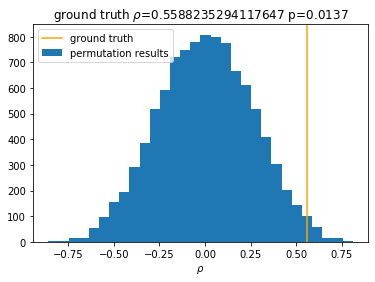

In [6]:
rho_ECOG, p_val_ECOG = icn_permutation_test.permutationTestSpearmansRho(df_here_ECOG["r2"], df_here_ECOG["b_peak"], True,r"$\rho$", 10000)

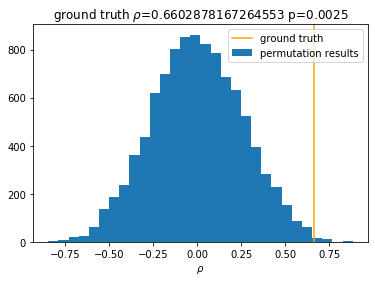

In [7]:
rho_STN, p_val_STN = icn_permutation_test.permutationTestSpearmansRho(df_here_STN["r2"], df_here_STN["b_peak"], True,r"$\rho$", 10000)

Text(0.5, 1.0, '$R^2$: Mean of Con. and Ips. best performances\nECOG $\\rho$=0.56 p=0.0137\nSTN $\\rho$=0.66 p=0.0025\nSum of Beta Peaks No Movement periodic fit\n ')

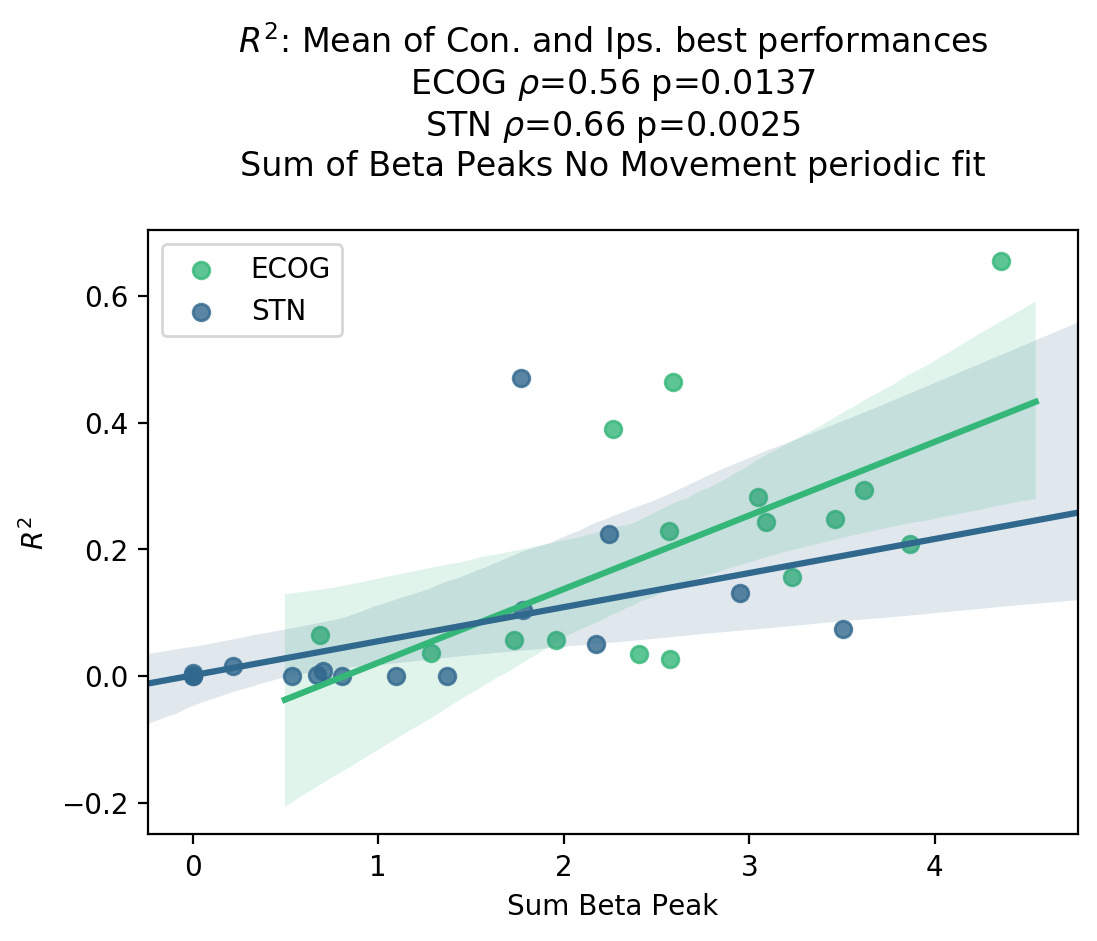

In [9]:
plt.figure(figsize=(6,4), dpi=200)
sns.regplot(x="b_peak", y="r2", data=df_here_ECOG, label="ECOG", color=(53/255,183/255,121/255))
sns.regplot(x="b_peak", y="r2", data=df_here_STN, label="STN", color=(49/255,104/255,142/255))
plt.legend()
plt.xlabel("Sum Beta Peak")
plt.ylabel(r"$R^2$")
plt.title(r"$R^2$"+": Mean of Con. and Ips. best performances\n"+
          "ECOG "+ r"$\rho$"+"="+str(np.round(rho_ECOG,2))+" p="+str(p_val_ECOG)+\
          "\nSTN "+ r"$\rho$"+"="+str(np.round(rho_STN,2))+" p="+str(p_val_STN)+\
          "\nSum of Beta Peaks No Movement periodic fit\n ")

### UPDRS Upper Rigidity Correlation

In [10]:
df_here = df_all[df_all["loc"].str.contains("ECOG")]
per_ = []
pred_ = []
for sub in subjects:
    sub_ = int(sub)
    per_.append(np.concatenate((df_here[df_here["sub"] == sub_]["r2_con"], \
                               df_here[df_here["sub"] == sub_]["r2_ips"])).mean())
   # pred_.append(df_here[df_here["sub"] == sub_][pred_var].mean())
    pred_.append(np.concatenate((df_here[df_here["sub"] == sub_]["UPDRS_rigidity_upper_extrimity_contralateral"], 
                               df_here[df_here["sub"] == sub_]["UPDRS_rigidity_upper_extrimity_ipsilateral"])).mean()) 
    
df_comp_ECOG = pd.DataFrame()
df_comp_ECOG["r2"] = np.array(per_)
df_comp_ECOG["pred"] = pred_

model = smf.ols("r2~pred", data=df_comp_ECOG)
results = model.fit()

SpearmanrResult(correlation=-0.6131617779732899, pvalue=0.04485069721774724)
                            OLS Regression Results                            
Dep. Variable:                     r2   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     9.459
Date:                Fri, 23 Oct 2020   Prob (F-statistic):             0.0132
Time:                        12:55:21   Log-Likelihood:                 10.938
No. Observations:                  11   AIC:                            -17.88
Df Residuals:                       9   BIC:                            -17.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

C:\Users\ICN_admin\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


In [11]:
df_here = df_all[df_all["loc"].str.contains("STN")]
per_ = []
pred_ = []
pred_var = "UPDRS_total"
for sub in subjects:
    sub_ = int(sub)
    per_.append(np.concatenate((df_here[df_here["sub"] == sub_]["r2_con"], \
                               df_here[df_here["sub"] == sub_]["r2_ips"])).mean())
   # pred_.append(df_here[df_here["sub"] == sub_][pred_var].mean())
    pred_.append(np.concatenate((df_here[df_here["sub"] == sub_]["UPDRS_rigidity_upper_extrimity_contralateral"], 
                               df_here[df_here["sub"] == sub_]["UPDRS_rigidity_upper_extrimity_ipsilateral"])).mean()) 
    
df_comp_STN = pd.DataFrame()
df_comp_STN["r2"] = np.array(per_)
df_comp_STN["pred"] = pred_

model = smf.ols("r2~pred", data=df_comp_STN)
results = model.fit()
print(stats.spearmanr(df_comp_STN["r2"], df_comp_STN["pred"]))
print(results.summary())



SpearmanrResult(correlation=-0.657241060772843, pvalue=0.027988158732147477)
                            OLS Regression Results                            
Dep. Variable:                     r2   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     7.960
Date:                Fri, 23 Oct 2020   Prob (F-statistic):             0.0200
Time:                        12:55:32   Log-Likelihood:                 14.232
No. Observations:                  11   AIC:                            -24.46
Df Residuals:                       9   BIC:                            -23.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

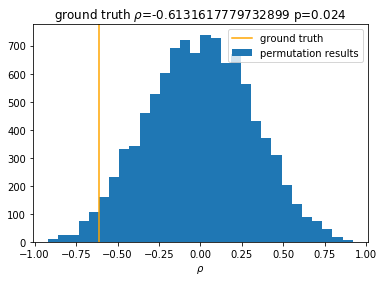

In [13]:
rho_ECOG, p_val_ECOG = icn_permutation_test.permutationTestSpearmansRho(df_comp_ECOG["r2"], df_comp_ECOG["pred"], True,r"$\rho$", 10000)

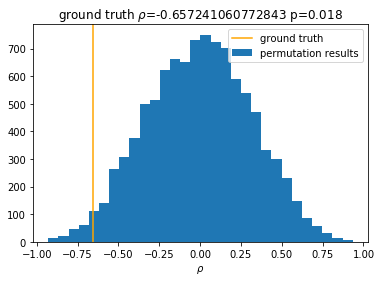

In [14]:
rho_STN, p_val_STN = icn_permutation_test.permutationTestSpearmansRho(df_comp_STN["r2"], df_comp_STN["pred"], True,r"$\rho$", 10000)

Text(0.5, 1.0, '\nUPDRS: Mean of Con. Ips. UPDRS Upper Rigidity \n $R^2$: Mean of Con. and Ips. mean performances \nECOG: $\\rho$=-0.61 p=0.024 STN: $\\rho$=-0.66 p=0.018')

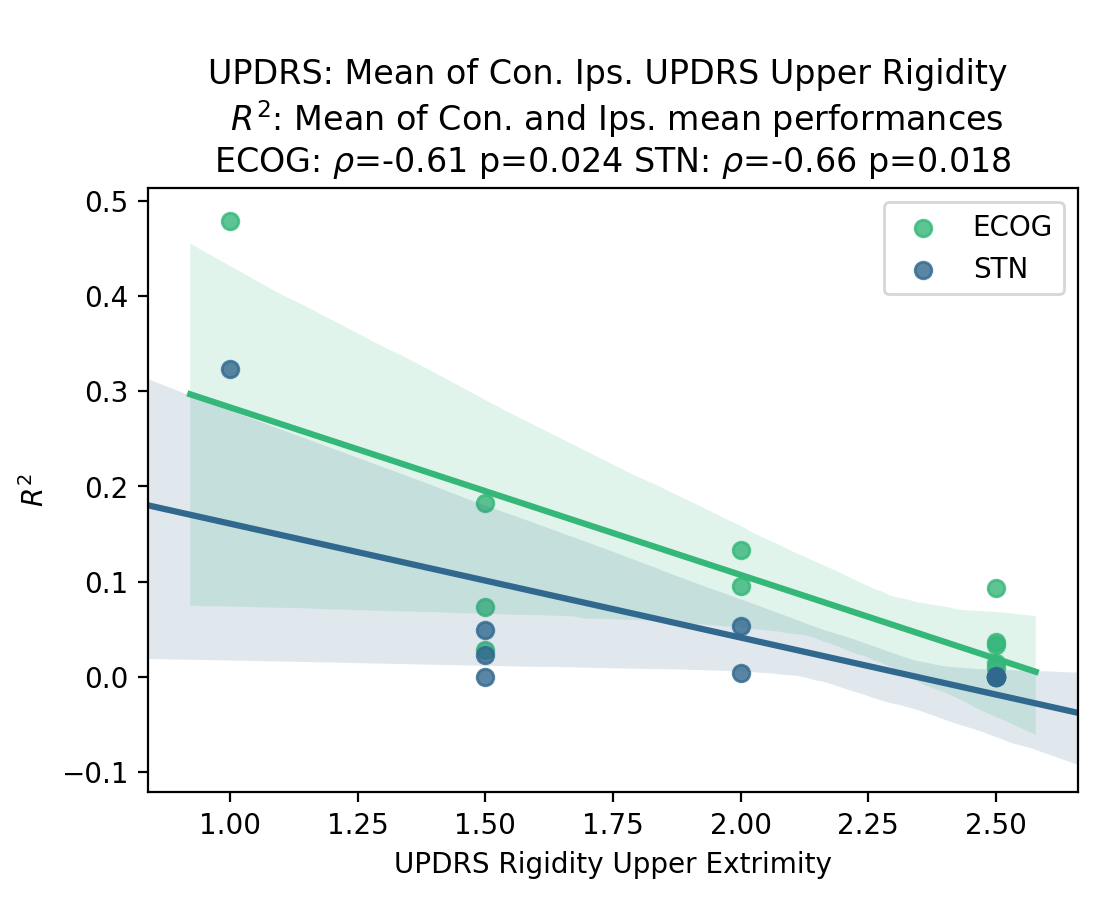

In [15]:
plt.figure(figsize=(6,4), dpi=200)

sns.regplot(x="pred", y="r2", data=df_comp_ECOG, color=(53/255,183/255,121/255), label="ECOG")
sns.regplot(x="pred", y="r2", data=df_comp_STN,  color=(49/255,104/255,142/255), label="STN")
plt.legend()
plt.xlabel("UPDRS Rigidity Upper Extrimity")
plt.ylabel(r"$R^2$")
plt.title("\nUPDRS: Mean of Con. Ips. UPDRS Upper Rigidity \n "+\
          r"$R^2$"+": Mean of Con. and Ips. mean performances \n"+\
          "ECOG: "r"$\rho$"+"="+str(np.round(rho_ECOG,2))+" p=" +str(p_val_ECOG)+\
          " STN: "r"$\rho$"+"="+str(np.round(rho_STN,2))+" p=" +str(p_val_STN))

### UPDRS total

In [16]:
df_here = df_all[df_all["loc"].str.contains("ECOG")]
per_ = []
pred_ = []
for sub in subjects:
    sub_ = int(sub)
    per_.append(np.concatenate((df_here[df_here["sub"] == sub_]["r2_con"], \
                               df_here[df_here["sub"] == sub_]["r2_ips"])).mean())
    pred_.append(df_here[df_here["sub"] == sub_]["UPDRS_total"].iloc[0]) 
    
    
print(stats.spearmanr(per_, pred_))
df_comp_ECOG = pd.DataFrame()
df_comp_ECOG["r2"] = np.arctanh(np.array(per_))
df_comp_ECOG["pred"] = pred_
model = smf.ols("r2~pred", data=df_comp_ECOG)
results = model.fit()

print(results.summary())

SpearmanrResult(correlation=-0.5512542775696283, pvalue=0.07878928423361271)
                            OLS Regression Results                            
Dep. Variable:                     r2   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     3.255
Date:                Fri, 23 Oct 2020   Prob (F-statistic):              0.105
Time:                        12:59:42   Log-Likelihood:                 7.7461
No. Observations:                  11   AIC:                            -11.49
Df Residuals:                       9   BIC:                            -10.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

C:\Users\ICN_admin\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


In [17]:
df_here = df_all[df_all["loc"].str.contains("STN")]
per_ = []
pred_ = []
for sub in subjects:
    sub_ = int(sub)
    per_.append(np.concatenate((df_here[df_here["sub"] == sub_]["r2_con"], \
                               df_here[df_here["sub"] == sub_]["r2_ips"])).mean())
   # pred_.append(df_here[df_here["sub"] == sub_][pred_var].mean())
    pred_.append(df_here[df_here["sub"] == sub_]["UPDRS_total"].iloc[0]) 
    
df_comp_STN = pd.DataFrame()
df_comp_STN["r2"] = np.array(per_)
df_comp_STN["pred"] = pred_

model = smf.ols("r2~pred", data=df_comp_STN)
results = model.fit()
print(stats.spearmanr(df_comp_STN["r2"], df_comp_STN["pred"]))
print(results.summary())

SpearmanrResult(correlation=-0.5525691640126262, pvalue=0.07793082878582444)
                            OLS Regression Results                            
Dep. Variable:                     r2   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     2.228
Date:                Fri, 23 Oct 2020   Prob (F-statistic):              0.170
Time:                        12:59:45   Log-Likelihood:                 11.964
No. Observations:                  11   AIC:                            -19.93
Df Residuals:                       9   BIC:                            -19.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

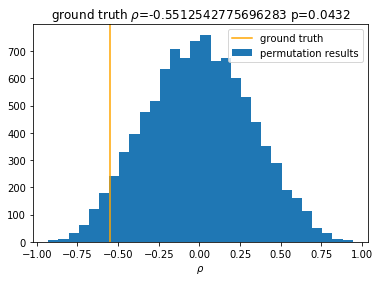

In [18]:
rho_ECOG, p_val_ECOG = icn_permutation_test.permutationTestSpearmansRho(df_comp_ECOG["r2"], df_comp_ECOG["pred"], True,r"$\rho$", 10000)

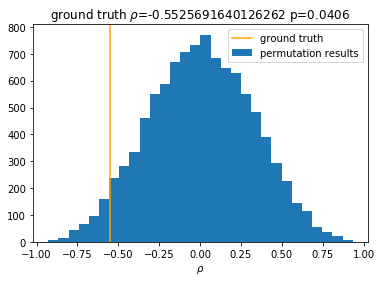

In [19]:
rho_STN, p_val_STN = icn_permutation_test.permutationTestSpearmansRho(df_comp_STN["r2"], df_comp_STN["pred"], True,r"$\rho$", 10000)

Text(0.5, 1.0, '$R^2$: Mean of Con. and Ips. mean performances \nECOG: $\\rho$=-0.55 p=0.0432 STN: $\\rho$=-0.55 p=0.0406')

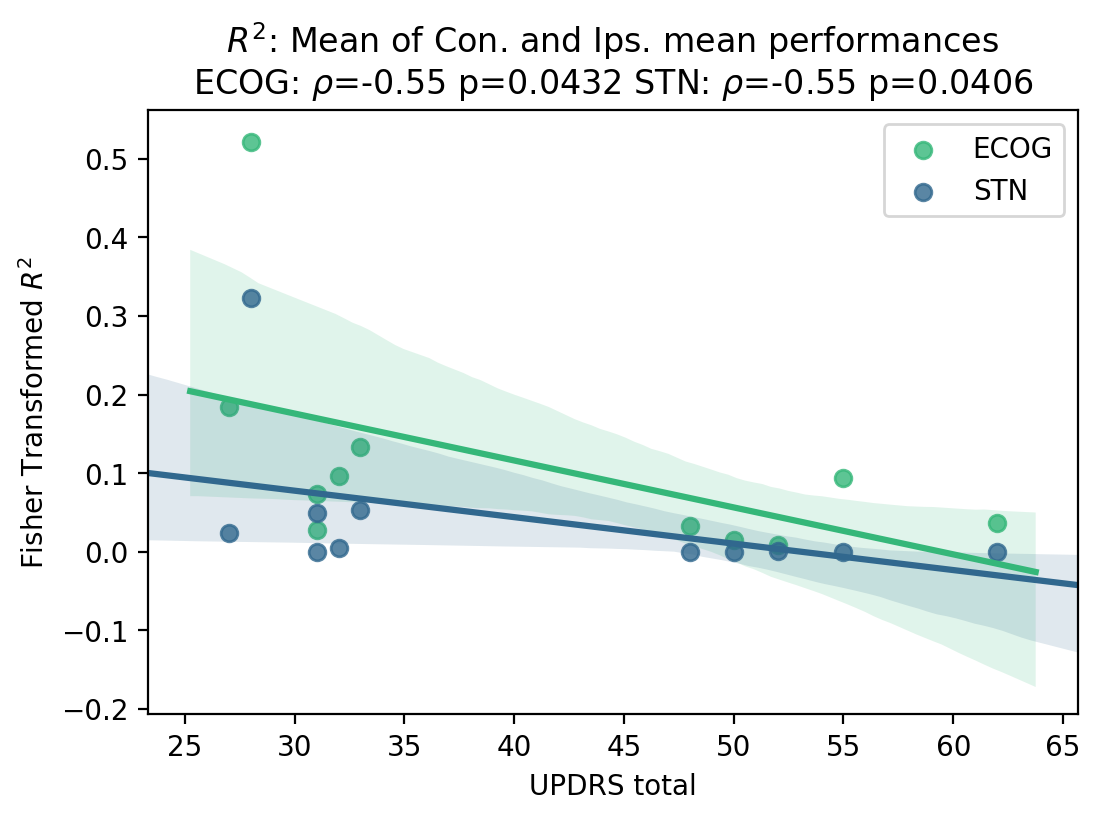

In [20]:
plt.figure(figsize=(6,4), dpi=200)

sns.regplot(x="pred", y="r2", data=df_comp_ECOG, color=(53/255,183/255,121/255), label="ECOG")
sns.regplot(x="pred", y="r2", data=df_comp_STN,  color=(49/255,104/255,142/255), label="STN")
plt.legend()
plt.xlabel("UPDRS total")
plt.ylabel("Fisher Transformed " + r"$R^2$")
plt.title(r"$R^2$"+": Mean of Con. and Ips. mean performances \n"+\
          "ECOG: "r"$\rho$"+"="+str(np.round(rho_ECOG,2))+" p=" +str(p_val_ECOG)+\
          " STN: "r"$\rho$"+"="+str(np.round(rho_STN,2))+" p=" +str(p_val_STN))

### combine ECOG and STN 

In [21]:
df_here_STN = df_all[df_all["loc"].str.contains("STN")]
df_here_ECOG = df_all[df_all["loc"].str.contains("ECOG")]
per_ = []
pred_ = []
for sub in subjects:
    sub_ = int(sub)
    per_.append(np.concatenate((df_here_ECOG[df_here_ECOG["sub"] == sub_]["r2_con"], \
                               df_here_ECOG[df_here_ECOG["sub"] == sub_]["r2_ips"], 
                         df_here_STN[df_here_STN["sub"] == sub_]["r2_con"], \
                               df_here_STN[df_here_STN["sub"] == sub_]["r2_ips"])).mean())

    pred_.append(df_here[df_here["sub"] == sub_]["UPDRS_total"].iloc[0]) 


df_comp = pd.DataFrame()
df_comp["r2"] = np.array(per_)
df_comp["pred"] = pred_
print(stats.spearmanr(df_comp["r2"], df_comp["pred"]))

model = smf.ols("r2~pred", data=df_comp_STN)
results = model.fit()

print(results.summary())

SpearmanrResult(correlation=-0.6104799437547951, pvalue=0.046060398811002226)
                            OLS Regression Results                            
Dep. Variable:                     r2   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     2.228
Date:                Fri, 23 Oct 2020   Prob (F-statistic):              0.170
Time:                        13:00:47   Log-Likelihood:                 11.964
No. Observations:                  11   AIC:                            -19.93
Df Residuals:                       9   BIC:                            -19.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

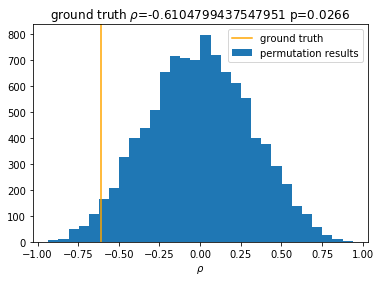

In [22]:
rho_, p_val_ = icn_permutation_test.permutationTestSpearmansRho(df_comp["r2"], df_comp["pred"], True,r"$\rho$", 10000)

Text(0.5, 1.0, '$R^2$: Mean of Con. and Ips. mean performances \nECOG and STN combined: $\\rho$=-0.61 p=0.0266')

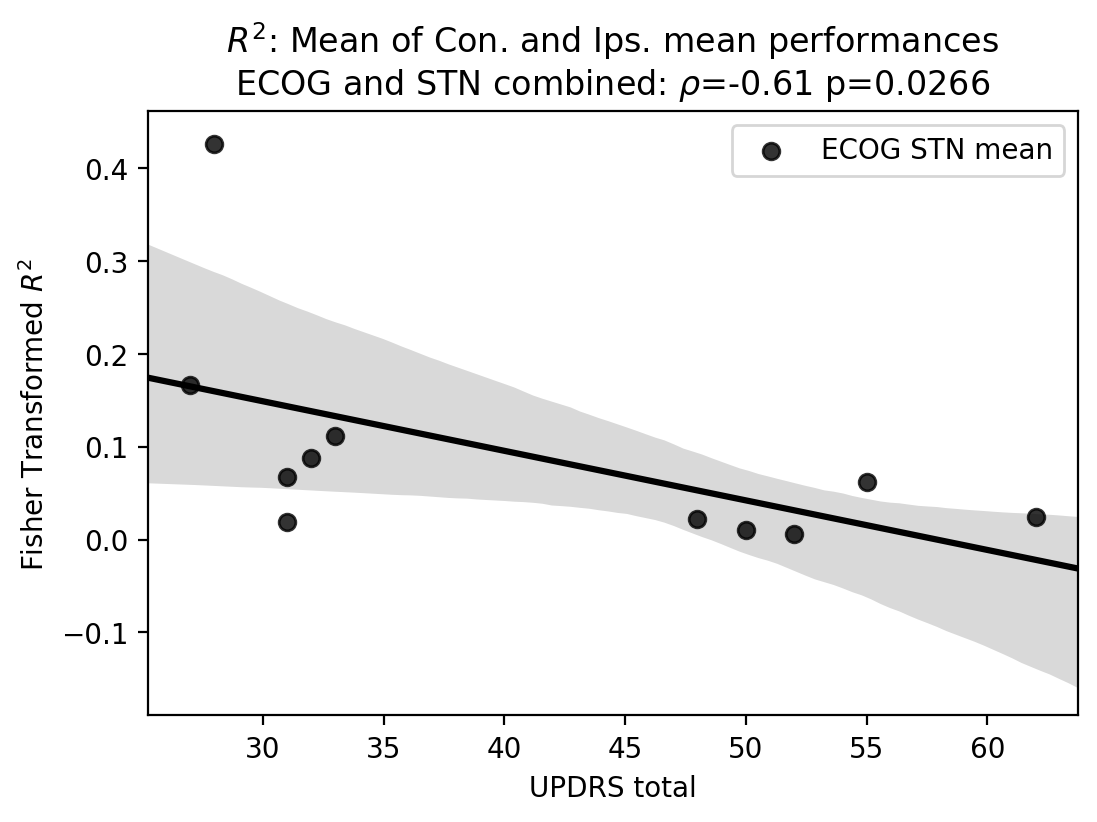

In [24]:
plt.figure(figsize=(6,4), dpi=200)

sns.regplot(x="pred", y="r2", data=df_comp, color="black", label="ECOG STN mean")
plt.legend()
plt.xlabel("UPDRS total")
plt.ylabel("Fisher Transformed " + r"$R^2$")
plt.title(r"$R^2$"+": Mean of Con. and Ips. mean performances \n"+\
          "ECOG and STN combined: "+ r"$\rho$"+"="+str(np.round(rho_,2))+" p=" +str(p_val_))

### Statistical tests between methods (Figure 3)

In [30]:
import math
PATH = "C:\\Users\\ICN_admin\\Dropbox (Brain Modulation Lab)\\Shared Lab Folders\\CRCNS\MOVEMENT DATA\\ECoG_STN\\NN_Out_NOCV\\"
patients = ['000', '001', '004', '005', '006', '007', '008', '009', '010', '013', '014']
PATH_BASE = "C:\\Users\\ICN_admin\\Dropbox (Brain Modulation Lab)\\Shared Lab Folders\\CRCNS\\MOVEMENT DATA\\ECoG_STN\\"

In [31]:
def get_res(PATH_, all_=True, best_Tr=False, SPOC_ = False, log_=False):
    """
    Given the resp. Path for LM/XGB/NN based on single channel estimaton; 
    return rather all, oder just the best CV test or test(best train) performances 
    returns dict(ECOG CON, ECOG IPS; STN CON, STN IPS)
    """
    res_files = os.listdir(PATH_)
    res_ = {}; # ECOG CON, ECOG IPS; STN CON, STN IPS
    for loc in ["ECOG", "STN"]:
        for lat in ["CON", "IPS"]:
            patients_ = []
            for sub in subjects:
                files = [f for f in res_files if (sub in f) and (loc in f)]
                max_ = []; tr_ = []; te_ = []
                for file in files: # Sess right or left
                    
                    if log_ is True: print(file)
                    if all_ is True:
                        max_.append(np.load(os.path.join(PATH_, file), 
                                               allow_pickle=True).tolist()["score_te"][lat])
                    else:
                        if SPOC_ is False:
                            max_.append(np.max(np.load(os.path.join(PATH_, file), 
                                               allow_pickle=True).tolist()["score_te"][lat]))
                            tr_.append(np.load(os.path.join(PATH_, file), allow_pickle=True).tolist()["score_tr"][lat])
                            te_.append(np.load(os.path.join(PATH_, file), allow_pickle=True).tolist()["score_te"][lat])

                        else:
                            max_.append(np.mean(np.load(os.path.join(PATH_, file), 
                                               allow_pickle=True).tolist()["score_te"][lat]))
                            tr_.append(np.mean(np.load(os.path.join(PATH_, file), allow_pickle=True).tolist()["score_tr"][lat]))
                            te_.append(np.mean(np.load(os.path.join(PATH_, file), allow_pickle=True).tolist()["score_te"][lat]))

                if all_ is True: 
                    patients_.append(np.concatenate(max_).ravel())
                else:
                    if best_Tr is True:
                        if SPOC_ is False:
                            patients_.append(np.concatenate(te_).ravel()[np.argmax(np.concatenate(tr_).ravel())])
                        else:
                            patients_.append(np.ravel(te_)[np.argmax(np.ravel(tr_))])
                    else:
                        patients_.append(np.max(max_))
            res_[loc+"_"+lat] = np.concatenate(patients_).ravel() if all_ is True else patients_
    return res_

In [32]:
res_here = []
for loc in ["ECOG", "STN"]:
    for lat in ["CON", "IPS"]:
        sc_p = []
        for sub in patients:
            sc_ = []
            files = [f for f in os.listdir(PATH) if sub in f and lat in f and loc in f]
            for f in files:
                res = np.load(os.path.join(PATH, f), allow_pickle=True)
                try:
                    if math.isnan(res.tolist()["score_te"]):
                        sc_.append(0)
                    else:
                        sc_.append(res.tolist()["score_te"])
                except:
                    sc_.append(0)
            try:
                sc_p.append(np.max(sc_))
            except:
                sc_p.append(0)
        res_here.append(sc_p)

res_NN = {
    "ECOG_CON": res_here[0],
    "ECOG_IPS": res_here[1],
    "STN_CON": res_here[2],
    "STN_IPS": res_here[3]
}

In [33]:
res_XGB =  get_res(os.path.join(PATH_BASE, "XGB_Out"), all_=False, best_Tr=False, log_=False, SPOC_=False)
res_LM =  get_res(os.path.join(PATH_BASE, "LM_Out"), all_=False, best_Tr=False, log_=False, SPOC_=False)
res_SPOC_LM = get_res(os.path.join(PATH_BASE, "LM_Out_SPoC"), all_=False, best_Tr=False, log_=False, SPOC_=True)
res_SPOC_XGB = get_res(os.path.join(PATH_BASE, "XGB_Out_SPoC"), all_=False, best_Tr=False, log_=False, SPOC_=True)


C:\Users\ICN_admin\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator ElasticNet from version 0.23.1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\ICN_admin\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator ElasticNet from version 0.23.1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [40]:
print(str(np.mean(res_XGB["ECOG_CON"])) + " " +str(np.std(res_XGB["ECOG_CON"])))

0.3062255774213281 0.22569944787098759


In [41]:
print(str(np.mean(res_XGB["ECOG_IPS"])) + " " +str(np.std(res_XGB["ECOG_IPS"])))

0.13464740966699165 0.14794545907331477


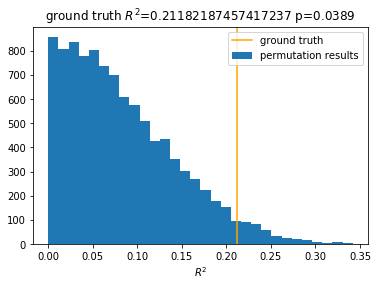

(0.21182187457417237, 0.0389)

In [44]:
icn_permutation_test.permutationTest(res_XGB["ECOG_CON"], res_XGB["STN_CON"], True, r"$R^2$", 10000)

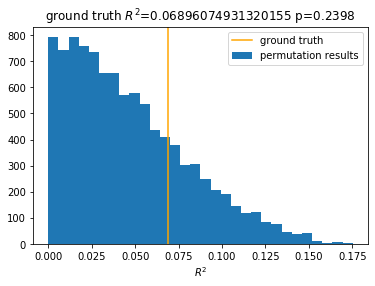

(0.06896074931320155, 0.2398)

In [45]:
icn_permutation_test.permutationTest(res_XGB["ECOG_IPS"], res_XGB["STN_IPS"], True, r"$R^2$", 10000)

0.19339097048166007 0.12890645572609163


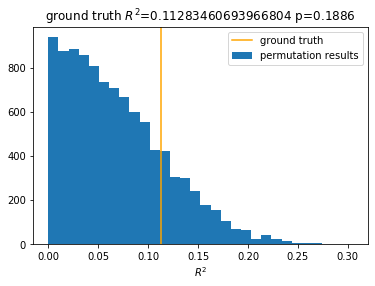

(0.11283460693966804, 0.1886)

In [59]:
# LM 
print(str(np.mean(res_LM["ECOG_CON"])) + " " +str(np.std(res_LM["ECOG_CON"])))
# permutation test 
icn_permutation_test.permutationTest(res_XGB["ECOG_CON"], res_LM["ECOG_CON"], True, r"$R^2$", 10000)

0.08919986844546668 0.06616775195460418


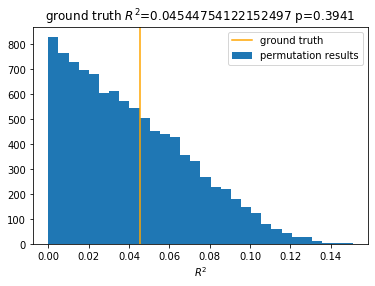

(0.04544754122152497, 0.3941)

In [60]:
# LM 
print(str(np.mean(res_LM["ECOG_IPS"])) + " " +str(np.std(res_LM["ECOG_IPS"])))
# permutation test 
icn_permutation_test.permutationTest(res_XGB["ECOG_IPS"], res_LM["ECOG_IPS"], True, r"$R^2$", 10000)

0.14127488691733173 0.24657510416018957


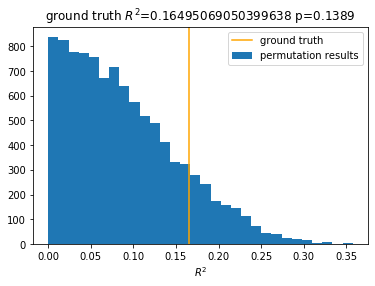

(0.16495069050399638, 0.1389)

In [55]:
# NN 
print(str(np.mean(res_NN["ECOG_CON"])) + " " +str(np.std(res_NN["ECOG_CON"])))
# permutation test 
icn_permutation_test.permutationTest(res_XGB["ECOG_CON"], res_NN["ECOG_CON"], True, r"$R^2$", 10000)

0.0872178497884035 0.19368648268275573


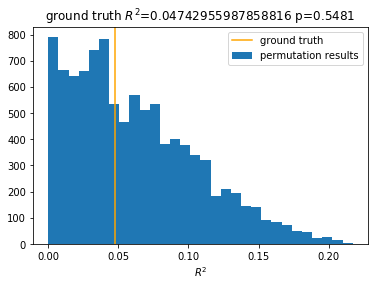

(0.04742955987858816, 0.5481)

In [61]:
# NN 
print(str(np.mean(res_NN["ECOG_IPS"])) + " " +str(np.std(res_NN["ECOG_IPS"])))
# permutation test 
icn_permutation_test.permutationTest(res_XGB["ECOG_IPS"], res_NN["ECOG_IPS"], True, r"$R^2$", 10000)

0.16331018602718236 0.12137499279867157


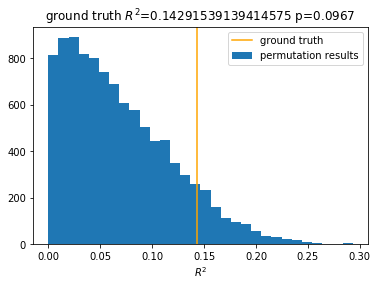

(0.14291539139414575, 0.0967)

In [56]:
# SPOC LM 
print(str(np.mean(res_SPOC_LM["ECOG_CON"])) + " " +str(np.std(res_SPOC_LM["ECOG_CON"])))
# permutation test 
icn_permutation_test.permutationTest(res_XGB["ECOG_CON"], res_SPOC_LM["ECOG_CON"], True, r"$R^2$", 10000)

0.08553741166230232 0.0735996253394602


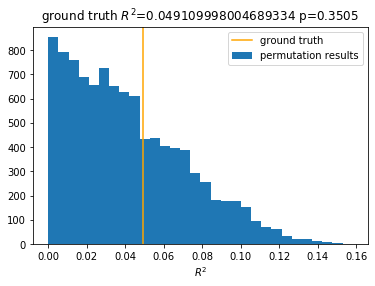

(0.049109998004689334, 0.3505)

In [62]:
# SPOC LM 
print(str(np.mean(res_SPOC_LM["ECOG_IPS"])) + " " +str(np.std(res_SPOC_LM["ECOG_IPS"])))
# permutation test 
icn_permutation_test.permutationTest(res_XGB["ECOG_IPS"], res_SPOC_LM["ECOG_IPS"], True, r"$R^2$", 10000)

0.23580613270524028 0.20401887146463016


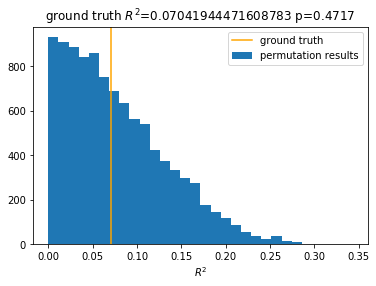

(0.07041944471608783, 0.4717)

In [58]:
# SPOC XGB 
print(str(np.mean(res_SPOC_XGB["ECOG_CON"])) + " " +str(np.std(res_SPOC_XGB["ECOG_CON"])))
# permutation test 
icn_permutation_test.permutationTest(res_XGB["ECOG_CON"], res_SPOC_XGB["ECOG_CON"], True, r"$R^2$", 10000)

0.08687018639706694 0.1360619816360244


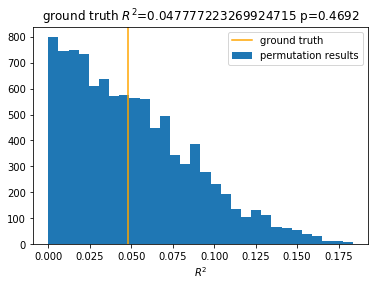

(0.047777223269924715, 0.4692)

In [63]:
# SPOC XGB 
print(str(np.mean(res_SPOC_XGB["ECOG_IPS"])) + " " +str(np.std(res_SPOC_XGB["ECOG_IPS"])))
# permutation test 
icn_permutation_test.permutationTest(res_XGB["ECOG_IPS"], res_SPOC_XGB["ECOG_IPS"], True, r"$R^2$", 10000)

### STN 

In [67]:
# LM 
print(str(np.mean(res_LM["STN_CON"])) + " " +str(np.std(res_LM["STN_CON"])))


0.09991290227332715 0.16199008922210797


In [71]:
print(str(np.mean(res_LM["STN_IPS"])) + " " +str(np.std(res_LM["STN_IPS"])))


0.06725381823885797 0.08754199774827508


In [68]:
print(str(np.mean(res_NN["STN_CON"])) + " " +str(np.std(res_NN["STN_CON"])))

0.015029542803316072 0.04752758744947086


In [72]:
print(str(np.mean(res_NN["STN_IPS"])) + " " +str(np.std(res_NN["STN_IPS"])))

0.0 0.0


In [69]:
print(str(np.mean(res_SPOC_LM["STN_CON"])) + " " +str(np.std(res_SPOC_LM["STN_CON"])))

0.09268271284950312 0.16112107268840872


In [73]:
print(str(np.mean(res_SPOC_LM["STN_IPS"])) + " " +str(np.std(res_SPOC_LM["STN_IPS"])))

0.05466282118395427 0.06885771060461787


In [70]:
print(str(np.mean(res_SPOC_XGB["STN_CON"])) + " " +str(np.std(res_SPOC_XGB["STN_CON"])))

0.09392647936616595 0.19754935345253813


In [74]:
print(str(np.mean(res_SPOC_XGB["STN_IPS"])) + " " +str(np.std(res_SPOC_XGB["STN_IPS"])))

0.05388534778350857 0.11786850570671417


In [76]:
print(str(np.mean(res_XGB["STN_CON"])) + " " +str(np.std(res_XGB["STN_CON"])))

0.09440370284715574 0.1947417800267217


In [75]:
print(str(np.mean(res_XGB["STN_IPS"])) + " " +str(np.std(res_XGB["STN_IPS"])))

0.0656866603537901 0.10496066674680594


0.3062255774213281 0.1947417800267217


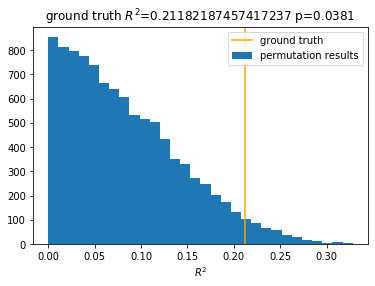

(0.21182187457417237, 0.0381)

In [77]:
# ECOG vs STN
print(str(np.mean(res_XGB["ECOG_CON"])) + " " +str(np.std(res_XGB["STN_CON"])))
# permutation test 
icn_permutation_test.permutationTest(res_XGB["ECOG_CON"], res_XGB["STN_CON"], True, r"$R^2$", 10000)

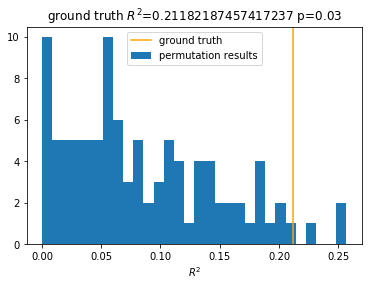

(0.21182187457417237, 0.03)

In [81]:
# ECOG vs STN
icn_permutation_test.permutationTest(res_XGB["ECOG_CON"], res_XGB["STN_CON"], True, r"$R^2$", 100)

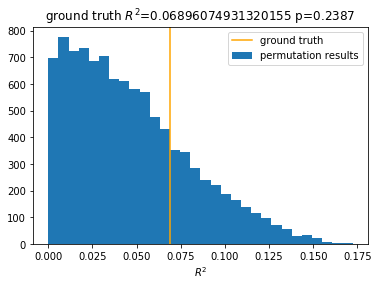

(0.06896074931320155, 0.2387)

In [84]:
# ECOG vs STN
icn_permutation_test.permutationTest(res_XGB["ECOG_IPS"], res_XGB["STN_IPS"], True, r"$R^2$", 10000)

In [83]:
stats.ranksums(res_XGB["ECOG_IPS"], res_XGB["STN_IPS"])

RanksumsResult(statistic=1.805787796286538, pvalue=0.07095149242730558)

### show diff with test(best train)

In [85]:
res_XGB_t =  get_res(os.path.join(PATH_BASE, "XGB_Out"), all_=False, best_Tr=True, log_=False, SPOC_=False)
res_LM_t =  get_res(os.path.join(PATH_BASE, "LM_Out"), all_=False, best_Tr=True, log_=False, SPOC_=False)
res_SPOC_LM_t = get_res(os.path.join(PATH_BASE, "LM_Out_SPoC"), all_=False, best_Tr=True, log_=False, SPOC_=True)
res_SPOC_XGB_t = get_res(os.path.join(PATH_BASE, "XGB_Out_SPoC"), all_=False, best_Tr=True, log_=False, SPOC_=True)


C:\Users\ICN_admin\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator ElasticNet from version 0.23.1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


0.29017170324586156 0.20909916400285442


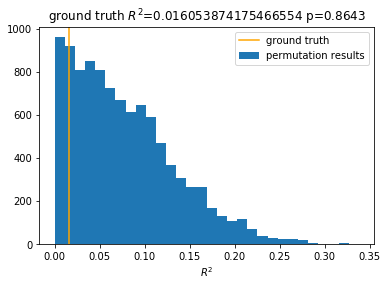

(0.016053874175466554, 0.8643)

In [87]:
# ECOG vs STN
print(str(np.mean(res_XGB_t["ECOG_CON"])) + " " +str(np.std(res_XGB_t["ECOG_CON"])))
# permutation test 
icn_permutation_test.permutationTest(res_XGB["ECOG_CON"], res_XGB_t["ECOG_CON"], True, r"$R^2$", 10000)

0.12334258439713128 0.1521443198019889


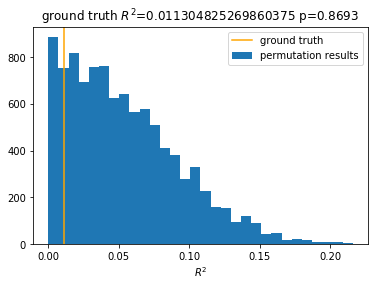

(0.011304825269860375, 0.8693)

In [88]:
# ECOG vs STN
print(str(np.mean(res_XGB_t["ECOG_IPS"])) + " " +str(np.std(res_XGB_t["ECOG_IPS"])))
# permutation test 
icn_permutation_test.permutationTest(res_XGB["ECOG_IPS"], res_XGB_t["ECOG_IPS"], True, r"$R^2$", 10000)

0.09354379524871184 0.19513545171967278


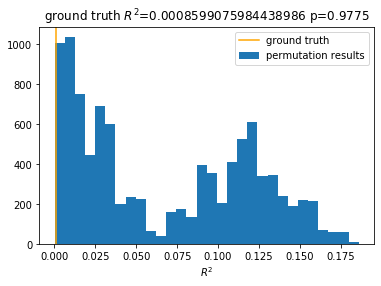

(0.0008599075984438986, 0.9775)

In [89]:
print(str(np.mean(res_XGB_t["STN_CON"])) + " " +str(np.std(res_XGB_t["STN_CON"])))
# permutation test 
icn_permutation_test.permutationTest(res_XGB["STN_CON"], res_XGB_t["STN_CON"], True, r"$R^2$", 10000)

0.0656866603537901 0.10496066674680594


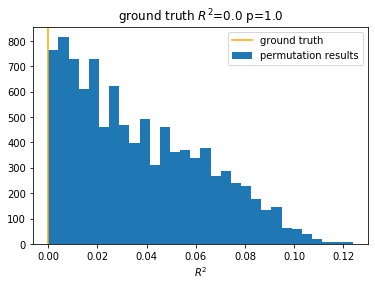

(0.0, 1.0)

In [90]:
print(str(np.mean(res_XGB_t["STN_IPS"])) + " " +str(np.std(res_XGB_t["STN_IPS"])))
# permutation test 
icn_permutation_test.permutationTest(res_XGB["STN_IPS"], res_XGB_t["STN_IPS"], True, r"$R^2$", 10000)

### stat. correlation with number of movements

In [99]:
movs = [128, 464, 213, 285, 381, 84, 161, 131, 547, 86, 205]

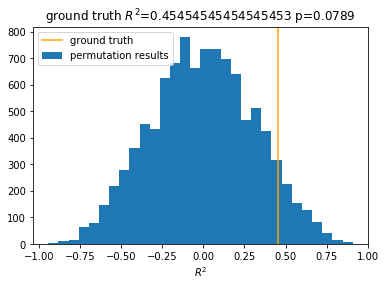

(0.45454545454545453, 0.0789)

In [112]:
icn_permutation_test.permutationTestSpearmansRho(movs, res_XGB["ECOG_CON"], True, r"$R^2$", 10000)

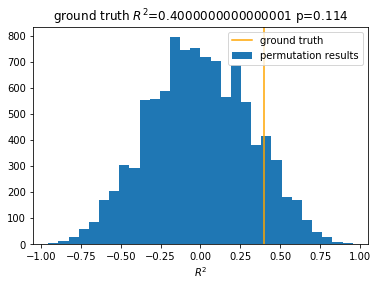

(0.4000000000000001, 0.114)

In [113]:
icn_permutation_test.permutationTestSpearmansRho(movs, res_XGB["ECOG_IPS"], True, r"$R^2$", 10000)

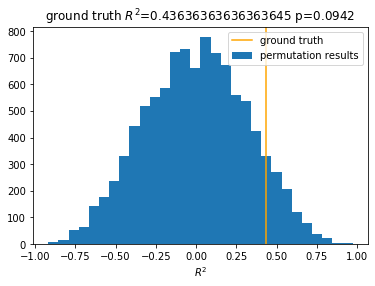

(0.43636363636363645, 0.0942)

In [114]:
icn_permutation_test.permutationTestSpearmansRho(movs, np.array([res_XGB["ECOG_CON"], res_XGB["ECOG_IPS"]]).mean(axis=0)
                                                 , True, r"$R^2$", 10000)

In [103]:
stats.spearmanr(res_XGB["ECOG_CON"], movs)

SpearmanrResult(correlation=0.45454545454545453, pvalue=0.16014543725525882)

In [104]:
stats.spearmanr(res_XGB["ECOG_IPS"], movs)

SpearmanrResult(correlation=0.4000000000000001, pvalue=0.22286835013352002)

In [111]:
stats.spearmanr(np.array([res_XGB["ECOG_CON"], res_XGB["ECOG_IPS"]]).mean(axis=0), movs)

SpearmanrResult(correlation=0.43636363636363645, pvalue=0.1796648765800112)